In [3]:
import pandas as pd
import os

print("Checking environment variables...")
assert 'PROJ_PATH' in os.environ
assert 'YOLOV7_ROOT_DIR' in os.environ
assert 'DATASET_MD5' in os.environ
assert 'ORIGINAL_DATASET_MD5' in os.environ
assert 'DATASET_ROOT_DIR' in os.environ
assert 'DATA_BUCKET' in os.environ
print("Environment variables exist.")

DATASET_ROOT_DIR = os.environ['DATASET_ROOT_DIR']

Checking environment variables...
Environment variables exist.


In [2]:
train_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_train.csv')).drop(columns=['domain'])
test_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_test.csv')).drop(columns=['domain'])
val_df = pd.read_csv(os.path.join(DATASET_ROOT_DIR, 'competition_val.csv')).drop(columns=['domain'])
train_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../gwhd_2021/competition_train.csv'

In [3]:
from gwhd_format_to_yolo import *

In [4]:
create_yolo_dir_tree()

create_yolo_format_subset(train_df, 'train')
create_yolo_format_subset(test_df, 'test')
create_yolo_format_subset(val_df, 'val')

[Errno 17] File exists: '../../../../gwhd_2021/images/d88963636d49127bda0597ef73f1703e92d6f111caefc44902d5932b8cd3fa94.png' -> '../gwhd_2021/yolo-format-dataset/images/train/d88963636d49127bda0597ef73f1703e92d6f111caefc44902d5932b8cd3fa94.png'
[Errno 17] File exists: '../../../../gwhd_2021/images/1961bcf453d5b2206c428c1c14fe55d1f26f3c655db0a2b6a83094476e8edb5b.png' -> '../gwhd_2021/yolo-format-dataset/images/train/1961bcf453d5b2206c428c1c14fe55d1f26f3c655db0a2b6a83094476e8edb5b.png'
[Errno 17] File exists: '../../../../gwhd_2021/images/da9846512ff19b8cd7278c8c973f75d36de8c4eb4e593b8285f6821aae1f4203.png' -> '../gwhd_2021/yolo-format-dataset/images/test/da9846512ff19b8cd7278c8c973f75d36de8c4eb4e593b8285f6821aae1f4203.png'


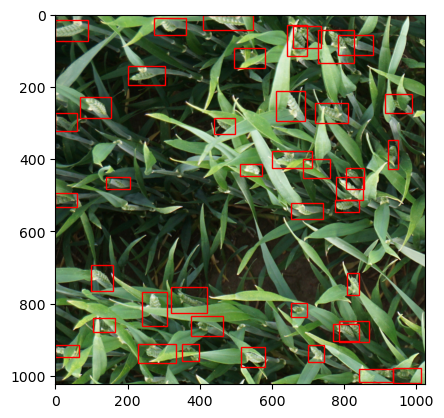

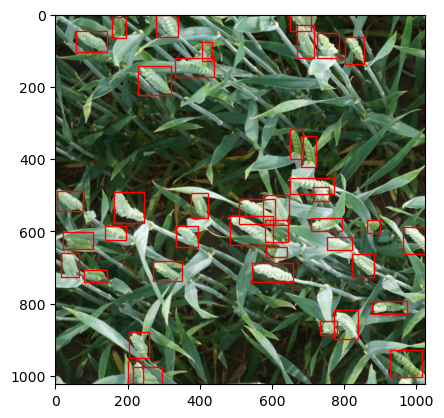

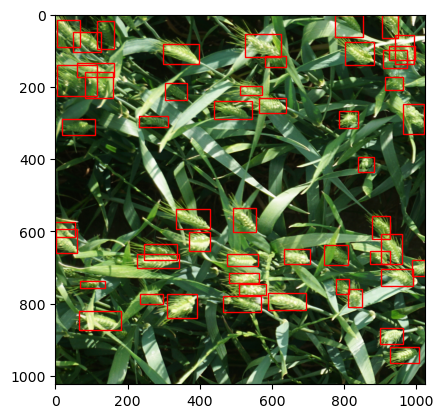

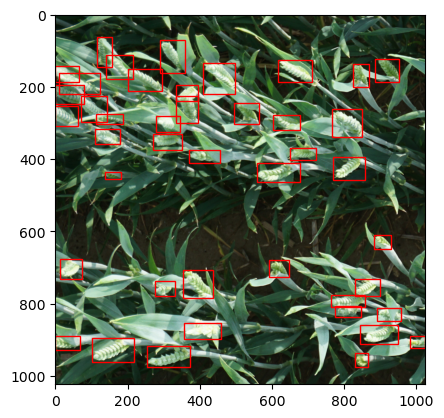

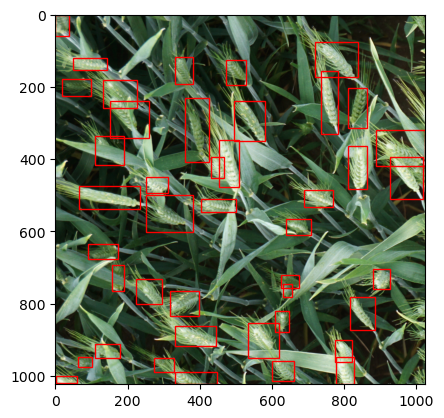

In [5]:
for i in range(5):
    image_name = train_df.iloc[i]['image_name']
    bboxes_gwhd = train_df.iloc[i]['BoxesString'].split(';')
    bboxes_gwhd = [bbox.split(' ') for bbox in bboxes_gwhd]
    bboxes_yolo = [gwhd_coords_to_yolo_coords(*map(int, bbox)) for bbox in bboxes_gwhd]
    plot_bboxes(image_name, bboxes_yolo)